# prepare data

In [22]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

from keras.preprocessing import image

In [23]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

### configure images and training/validattion sets

In [24]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


### define model

In [25]:
model = Sequential()

# https://keras.io/layers/convolutional/#convolution2d
# 32 of 3x3 conv filter
model.add(Convolution2D(32, 3, 3, input_shape=(3, img_width, img_height)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# https://keras.io/objectives/
# https://keras.io/metrics/
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



### Training

In [26]:
nb_epoch = 20
nb_train_samples = 2048
nb_validation_samples = 832

# https://keras.io/models/sequential/#sequential-model-methods
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)


Epoch 1/20
2048/2048 [==============================] - 105s - loss: 0.7633 - acc: 0.5171 - val_loss: 0.6948 - val_acc: 0.5000

In [29]:
model.save_weights('basic_cnn_20_epochs.h5')

### Evaluation

In [30]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[1.254442606980984, 0.71754807692307687]

### Testing

In [75]:
# https://keras.io/applications/
img = image.load_img('cat1.jpg',target_size=(150, 150))
x = np.asarray(img, dtype='float32')
x = x.transpose(2, 0, 1)
x = np.expand_dims(x, axis=0)

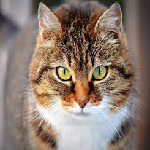

In [76]:
img

In [71]:
x.shape

(1, 3, 150, 150)

In [72]:
preds = model.predict(x)
print(preds)

[[ 0.]]


In [77]:
img = image.load_img('dog.jpeg',target_size=(150, 150))

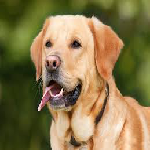

In [78]:
img

In [79]:
x = np.asarray(img, dtype='float32')
x = x.transpose(2, 0, 1)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print(preds)

[[ 1.]]
